In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("merged_college_data.csv")

In [3]:
# Select Features & Target
df_ml = df[["In-State Tuition", "Graduation Rate", "Student Population", "Acceptance Rate", "Median Earnings (10 yrs)"]].dropna()
X = df_ml[["In-State Tuition", "Graduation Rate", "Student Population", "Acceptance Rate"]]
y = df_ml["Median Earnings (10 yrs)"]

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize and Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Lasso Regression": Lasso(alpha=1)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    results[name] = round(r2, 4)

In [6]:
# Display R^2 Results
for model, score in results.items():
    print(f"{model}: R^2 Score = {score}")

Linear Regression: R^2 Score = 0.7804
Ridge Regression: R^2 Score = 0.7804
Lasso Regression: R^2 Score = 0.7804


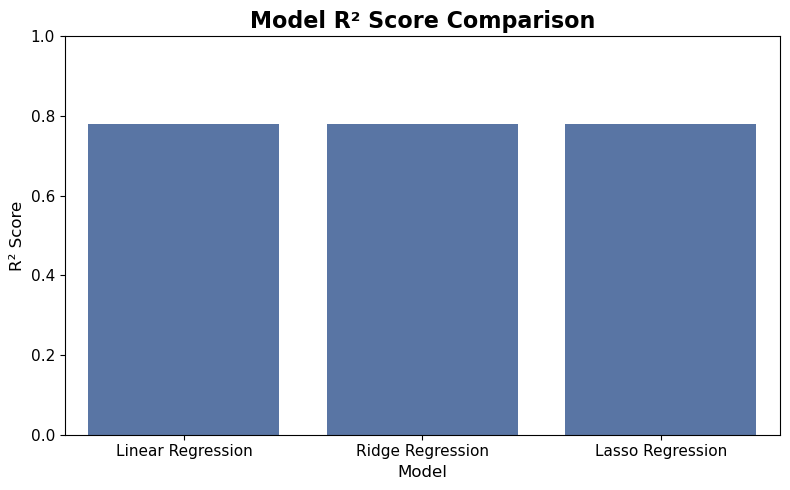

In [9]:
# Bar Chart Comparison
results_df = pd.DataFrame({
    "Model": list(results.keys()),
    "R2": list(results.values())
})

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x="Model", y="R2", color="#4C72B0")
plt.title("Model R² Score Comparison", fontsize=16, weight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()